<a href="https://colab.research.google.com/github/Ilef-Mhamdi/Smoking-Dataset---MLP-Classification/blob/main/Final_project_for_ANN_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Smoking Dataset - MLP Classification***

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

 **Load dataset**

In [ ]:
df = pd.read_csv('Smoking.csv')

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nDescriptive statistics:")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nTarget variable distribution:")
print(df['smoking'].value_counts())


First 5 rows of the dataset:
   ID  age  height(cm)  weight(kg)  waist(cm)  systolic  relaxation  \
0   1   40         155          60       81.3       114          73   
1   2   40         160          60       81.0       119          70   
2   3   55         170          60       80.0       138          86   
3   4   40         165          70       88.0       100          60   
4   5   40         155          60       86.0       120          74   

   fasting blood sugar  Cholesterol  triglyceride  HDL  LDL  hemoglobin  \
0                   94          215            82   73  126        12.9   
1                  130          192           115   42  127        12.7   
2                   89          242           182   55  151        15.8   
3                   96          322           254   45  226        14.7   
4                   80          184            74   62  107        12.5   

   serum creatinine  AST  ALT  Gtp  smoking  
0               0.7   18   19   27        0  
1

**Data preprocessing**

**Encoding categorical variables (except target)**

In [ ]:
for col in df.select_dtypes(include='object').columns:
    if col != 'smoking':
        df[col] = LabelEncoder().fit_transform(df[col])

**Fill missing values with median for numerical columns**



In [ ]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

**Exploratory Data Analysis (EDA)**

---


**Histograms**




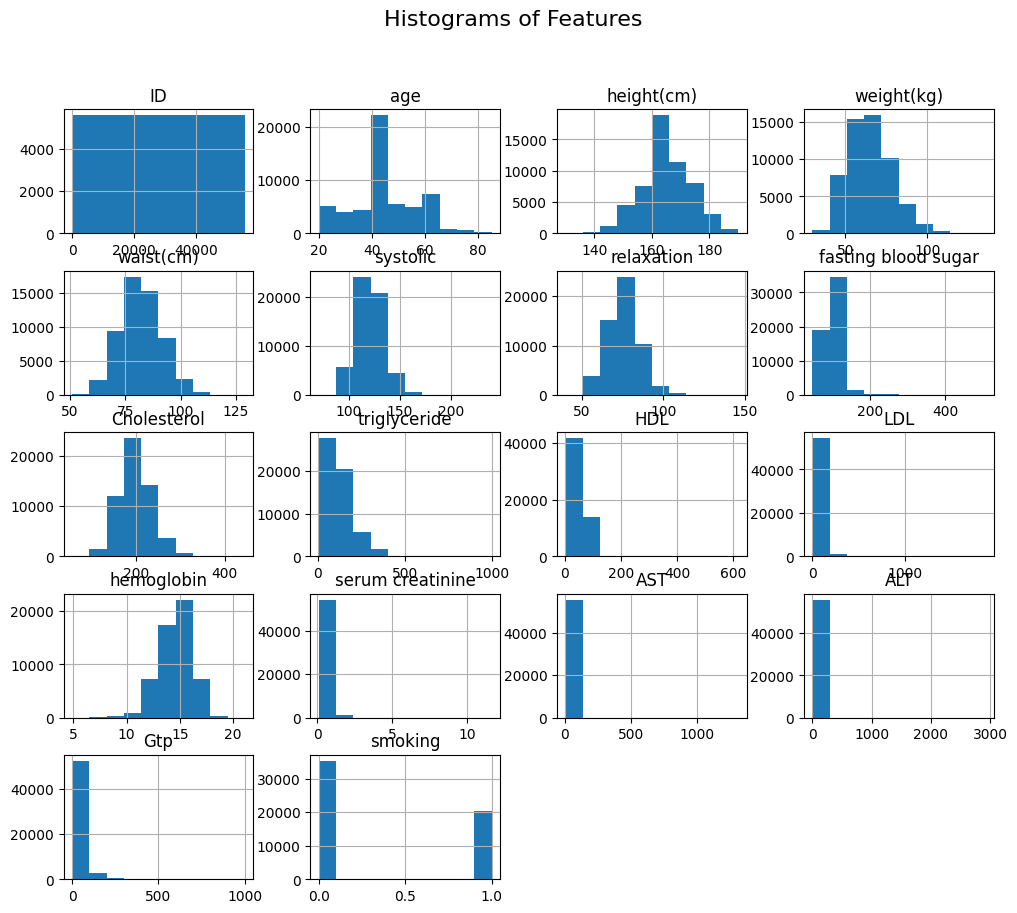

In [ ]:
df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Features', fontsize=16)
plt.show()

**Boxplots**

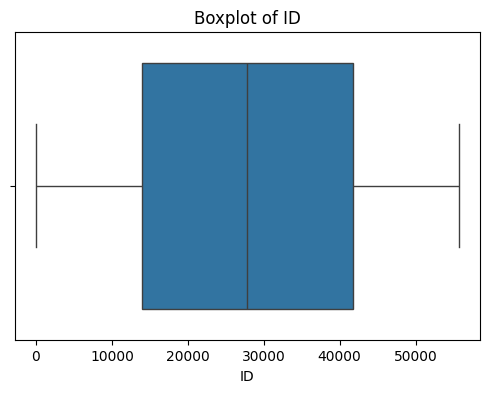

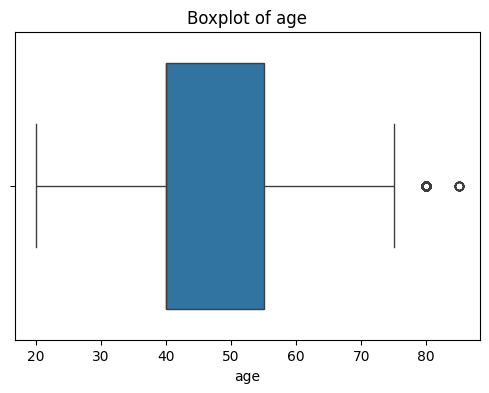

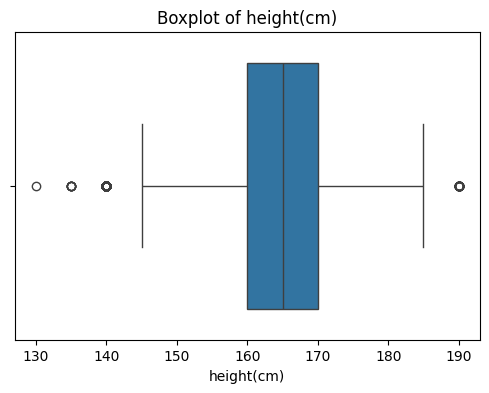

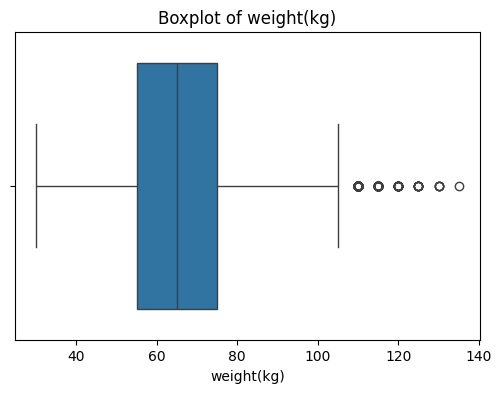

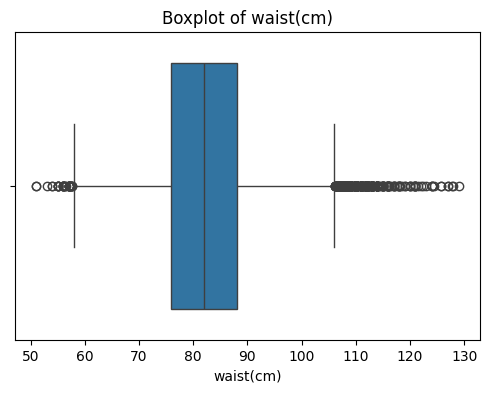

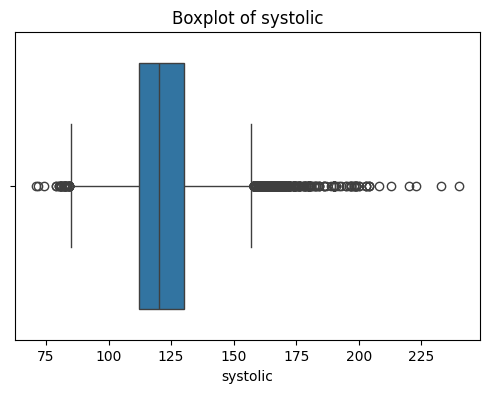

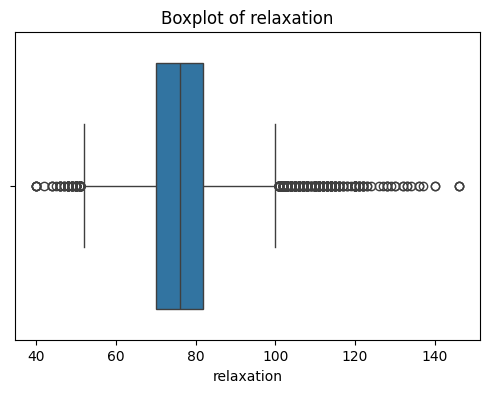

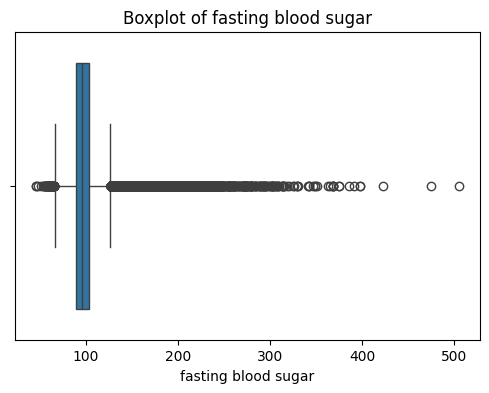

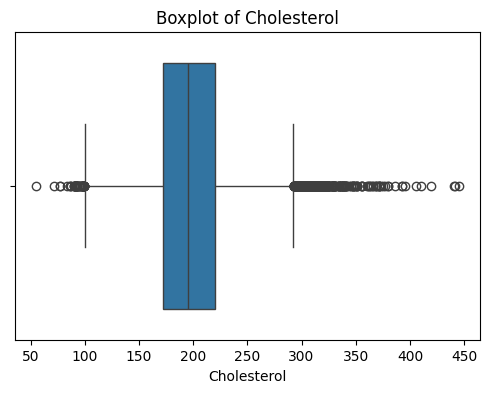

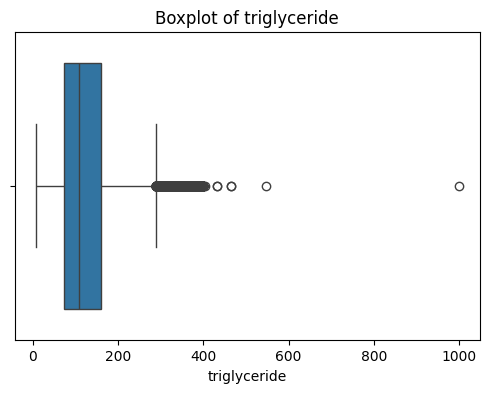

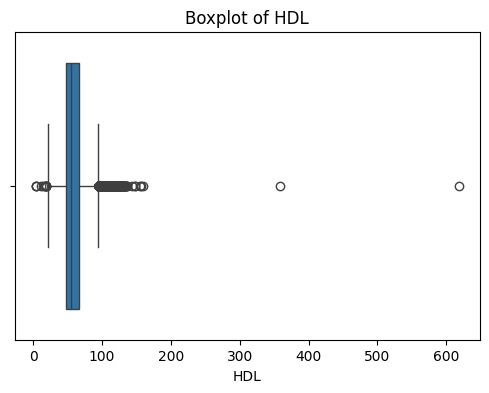

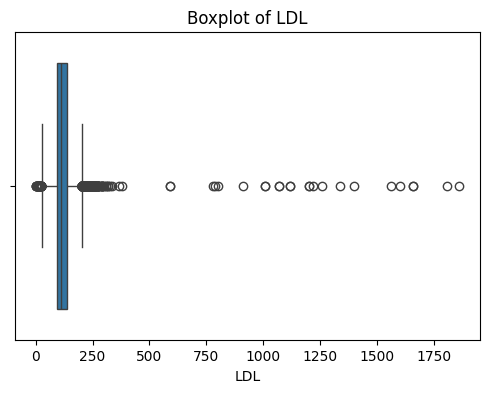

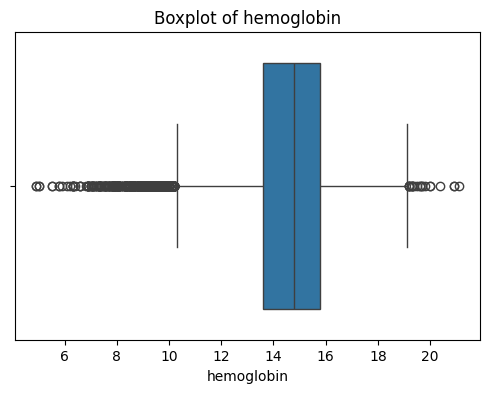

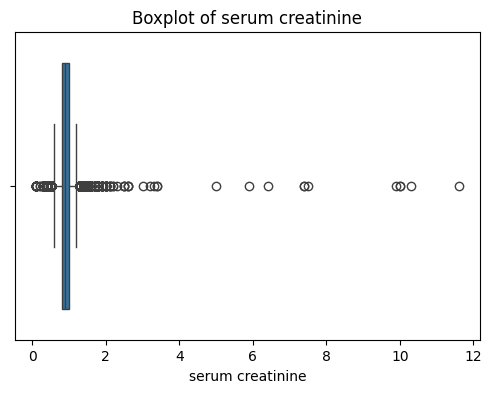

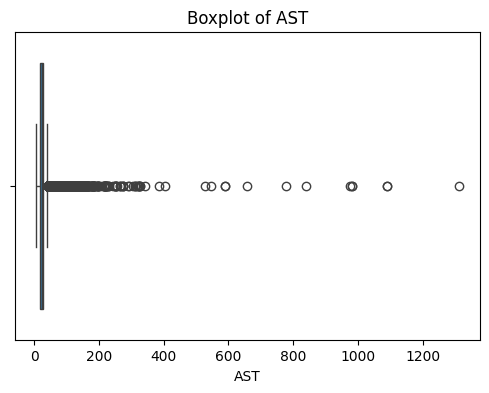

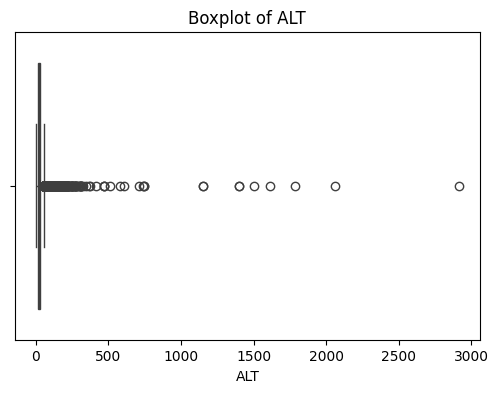

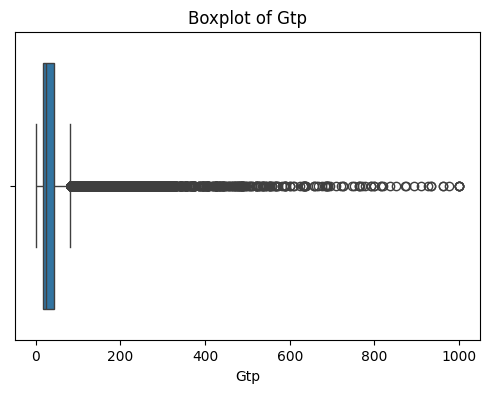

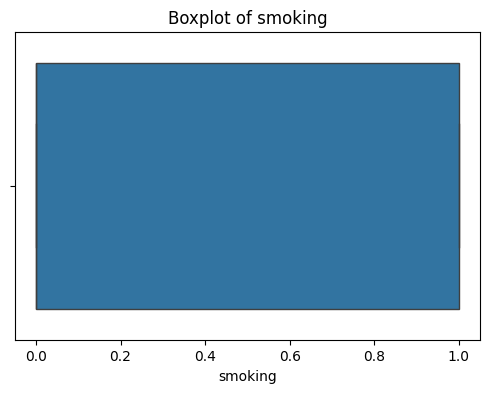

In [ ]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**KDE plots**

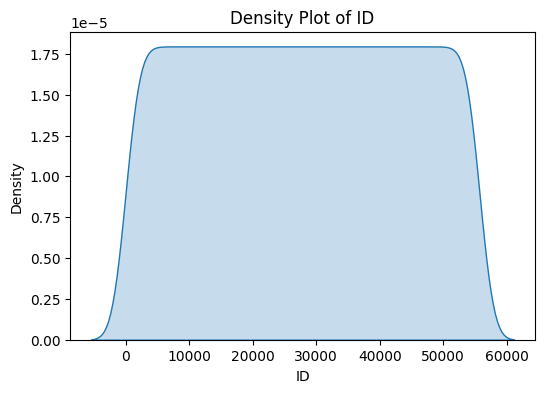

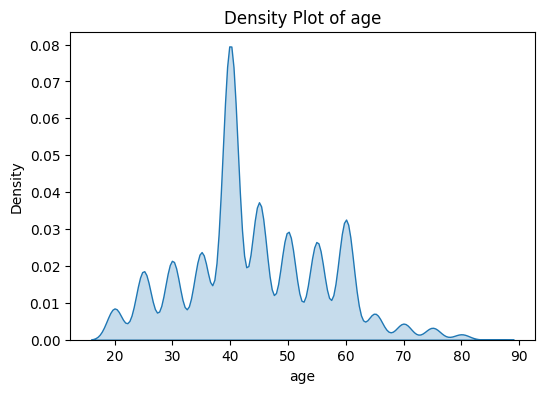

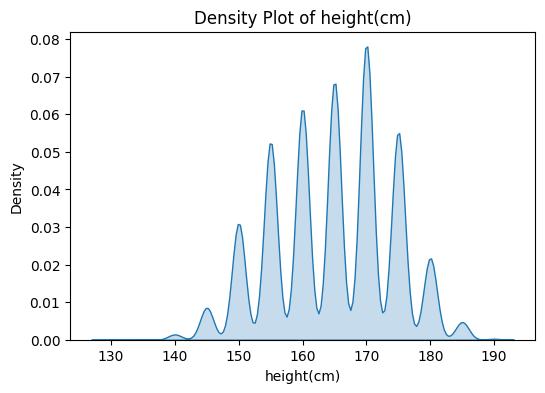

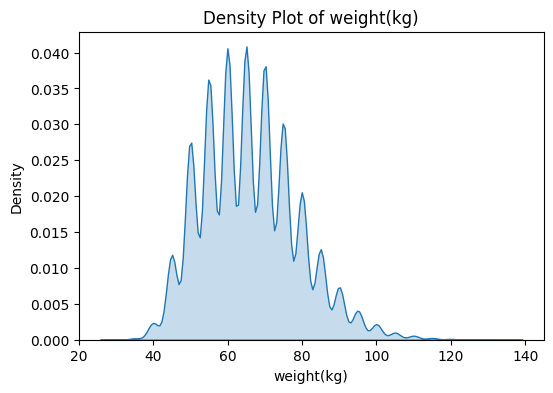

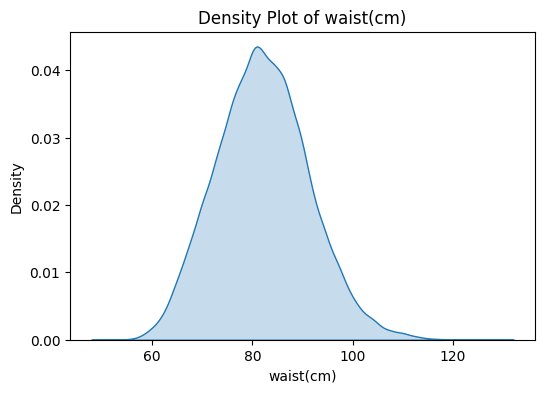

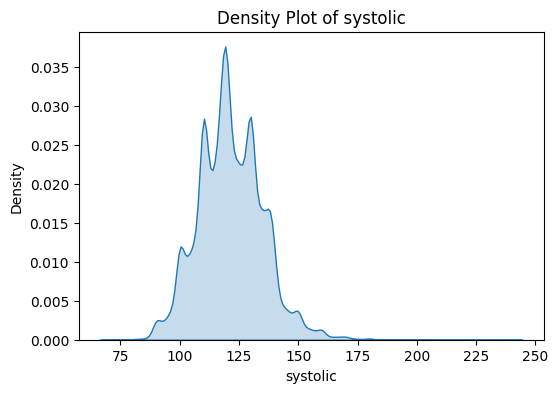

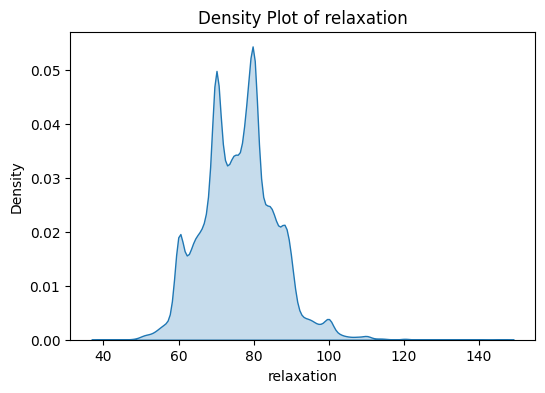

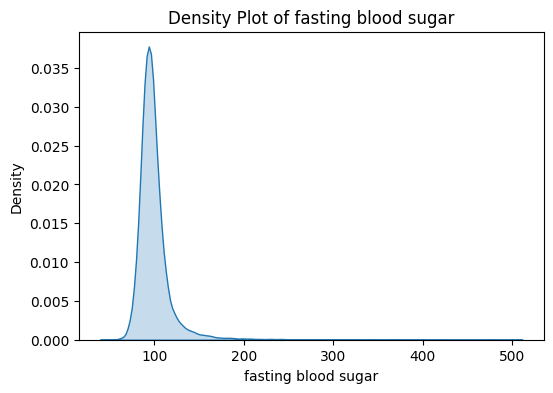

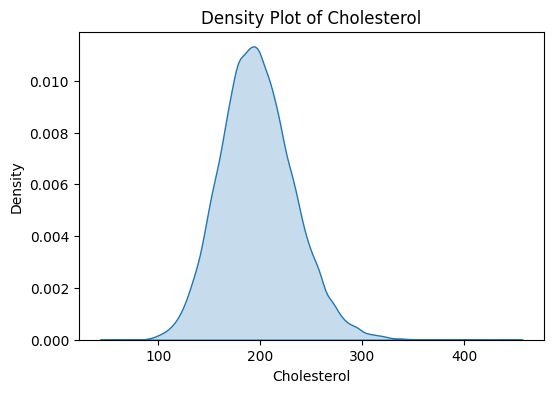

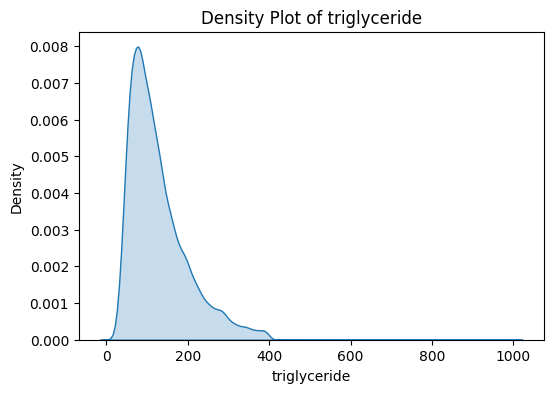

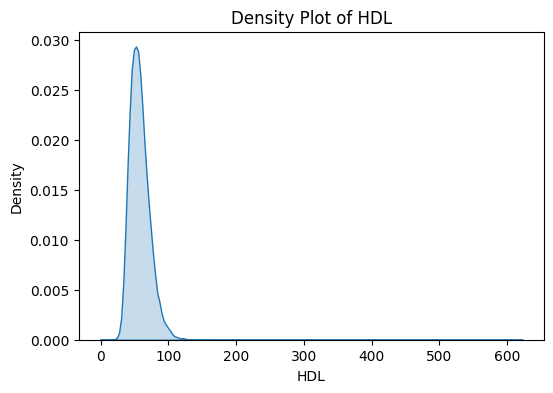

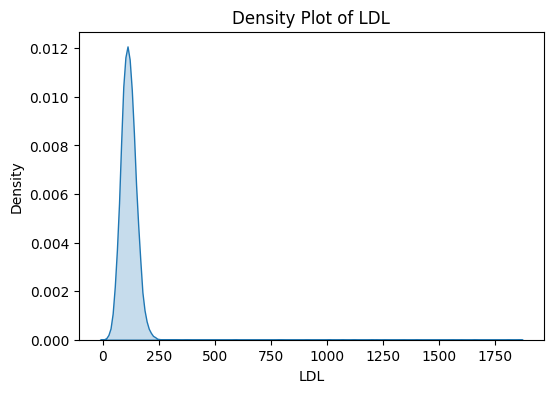

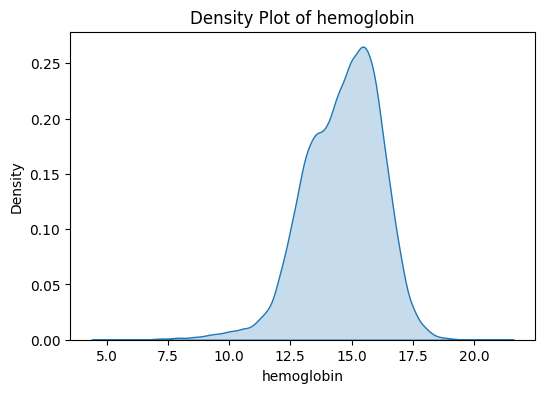

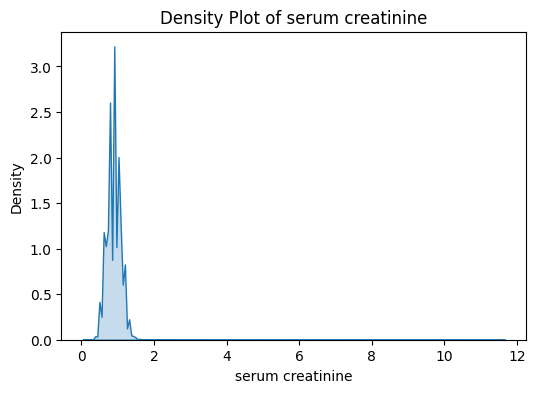

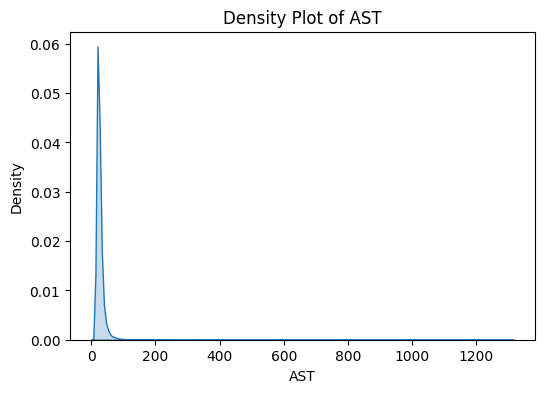

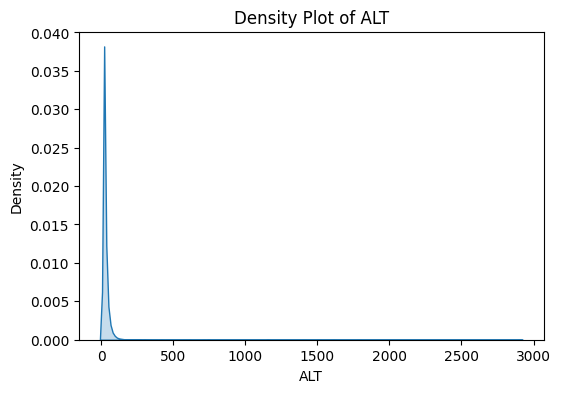

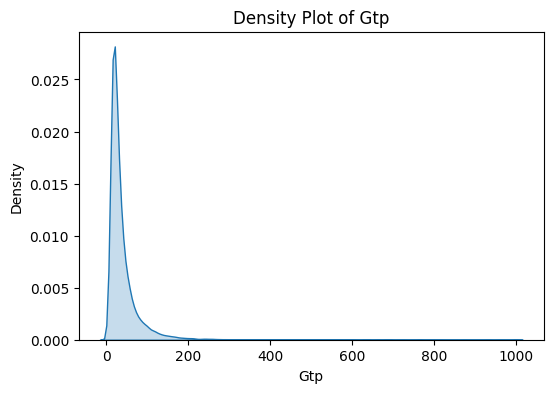

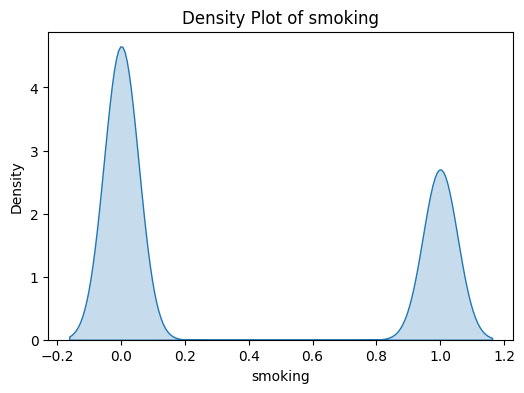

In [ ]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[col], fill=True)

    plt.title(f'Density Plot of {col}')
    plt.show()


**Splitting the dataset into features and target**

In [ ]:
X = df.drop('smoking', axis=1)
y = df['smoking']

#75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=240043826, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Training and evaluating the MLP models with different hidden layer configs**


Training MLP with hidden layers: (8, 4)
Train Accuracy: 0.7534
Test Accuracy: 0.7470
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      8809
           1       0.65      0.67      0.66      5114

    accuracy                           0.75     13923
   macro avg       0.73      0.73      0.73     13923
weighted avg       0.75      0.75      0.75     13923



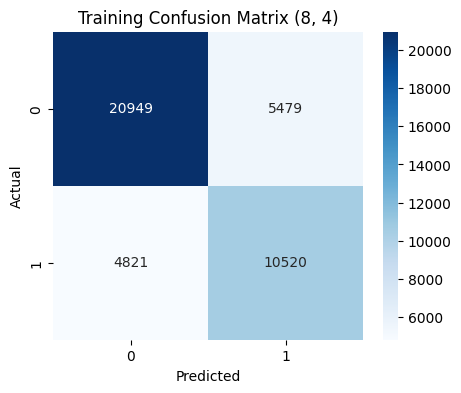

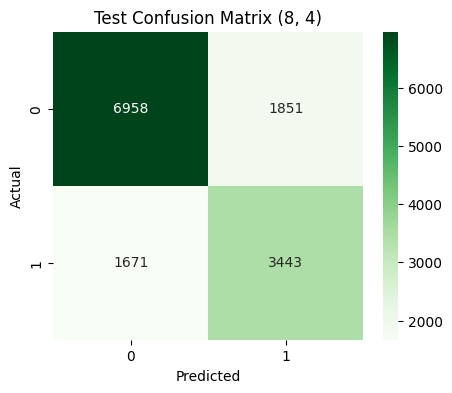


Training MLP with hidden layers: (16, 8)
Train Accuracy: 0.7625
Test Accuracy: 0.7477
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      8809
           1       0.65      0.66      0.66      5114

    accuracy                           0.75     13923
   macro avg       0.73      0.73      0.73     13923
weighted avg       0.75      0.75      0.75     13923



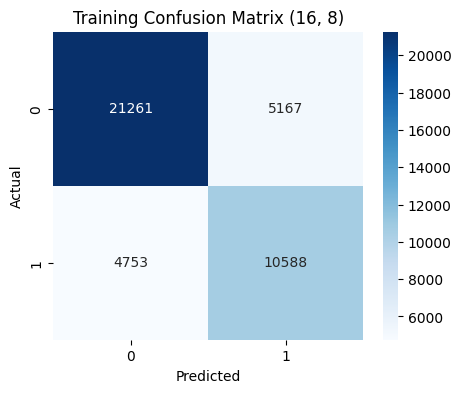

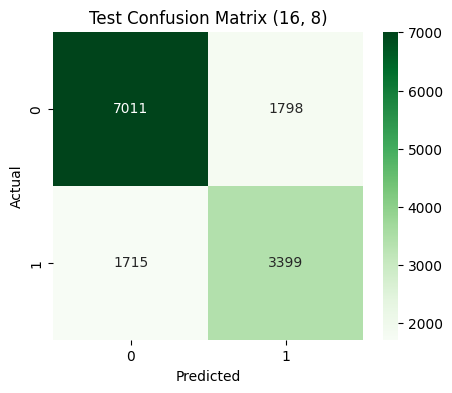


Training MLP with hidden layers: (32, 16)
Train Accuracy: 0.7743
Test Accuracy: 0.7448
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      8809
           1       0.65      0.67      0.66      5114

    accuracy                           0.74     13923
   macro avg       0.73      0.73      0.73     13923
weighted avg       0.75      0.74      0.75     13923



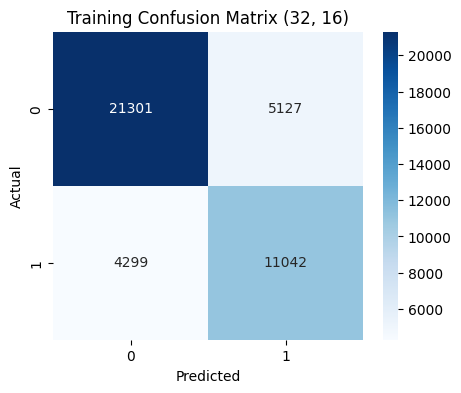

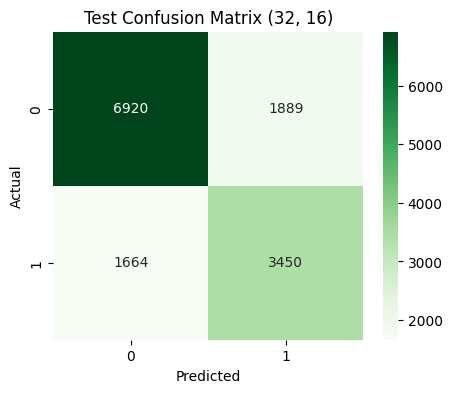


Training MLP with hidden layers: (16, 16, 8)
Train Accuracy: 0.7656
Test Accuracy: 0.7422
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      8809
           1       0.65      0.65      0.65      5114

    accuracy                           0.74     13923
   macro avg       0.72      0.72      0.72     13923
weighted avg       0.74      0.74      0.74     13923



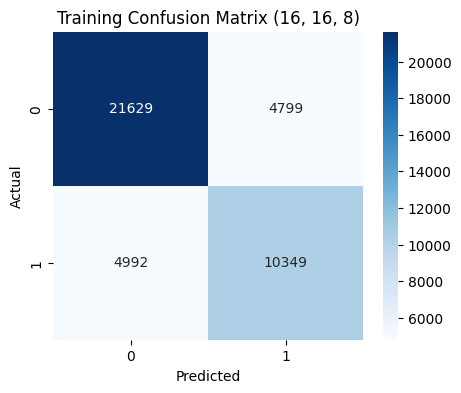

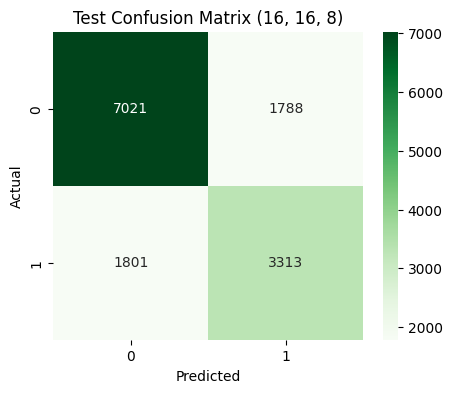


Summary of all models:
  Hidden Layers  Train Accuracy  Test Accuracy
0        (8, 4)        0.753406       0.747037
1       (16, 8)        0.762503       0.747684
2      (32, 16)        0.774330       0.744811
3   (16, 16, 8)        0.765592       0.742225


In [ ]:
results = []

hidden_layer_configs = [
    (8, 4),
    (16, 8),
    (32, 16),
    (16, 16, 8)
]

for config in hidden_layer_configs:
    print(f"\nTraining MLP with hidden layers: {config}")
    mlp = MLPClassifier(hidden_layer_sizes=config, activation='relu', max_iter=1000, random_state=240043826)
    mlp.fit(X_train, y_train)

    # Predictions
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

    # Classification report (test)
    print("Classification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix - train
    cm_train = confusion_matrix(y_train, y_train_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Training Confusion Matrix {config}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Confusion matrix - test
    cm_test = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Test Confusion Matrix {config}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Save results
    results.append({
        'Hidden Layers': config,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc
    })

# 7. Summary of results
results_df = pd.DataFrame(results)
print("\nSummary of all models:")
print(results_df)
